In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV
df = pd.read_csv("Formula1_2023season_drivers.csv")

In [6]:
df

,Driver,Abbreviation,No,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
0,Max Verstappen,VER,1,Red Bull Racing,Netherlands,98,2586.5,185,3,1(x54),1,30/09/1997,"Hasselt, Belgium"
1,Sergio Perez,PER,11,Red Bull Racing,Mexico,35,1486.0,258,0,1(x6),1,26/01/1990,"Guadalajara, Mexico"
2,Lewis Hamilton,HAM,44,Mercedes,United Kingdom,197,4639.5,332,7,1(x103),1,07/01/1985,"Stevenage, England"
3,Fernando Alonso,ALO,14,Aston Martin,Spain,106,2267.0,380,2,1(x32),1,29/07/1981,"Oviedo, Spain"
4,Charles Leclerc,LEC,16,Ferrari,Monaco,30,1074.0,125,0,1(x5),1,16/10/1997,"Monte Carlo, Monaco"
5,Lando Norris,NOR,4,McLaren,United Kingdom,13,633.0,104,0,2(x7),1,13/11/1999,"Bristol, England"
6,Carlos Sainz,SAI,55,Ferrari,Sapin,18,982.5,185,0,1(x2),1,01/09/1994,"Madrid, Spain"
7,George Russell,RUS,63,Mercedes,United Kingdom,11,469.0,104,0,1(x1),1,15/02/1998,"King's Lynn, England"
8,Oscar Piastri,PIA,81,McLaren,Australia,2,97.0,22,0,2(x1),2,06/04/2001,"Melbourne, Victoria"
9,Lance Stroll,STR,18,Aston Martin,Canada,3,268.0,143,0,3(x3),1,29/10/1998,"Montreal, Canada"


In [7]:
# Group data by team and FPTS
new_df = pd.DataFrame(df.groupby("Team")["Points"].sum()).reset_index(drop=False)
# Make the new df sort by aesending order
new_df = new_df.sort_values(by="Points", ascending=True)

In [8]:
new_df

,Team,Points
9,Williams,229.0
5,Haas F1 Team,716.0
6,McLaren,730.0
2,Alpine,816.0
1,AlphaTauri,1382.0
0,Alfa Romeo,1809.0
4,Ferrari,2056.5
3,Aston Martin,2535.0
8,Red Bull Racing,4072.5
7,Mercedes,5108.5


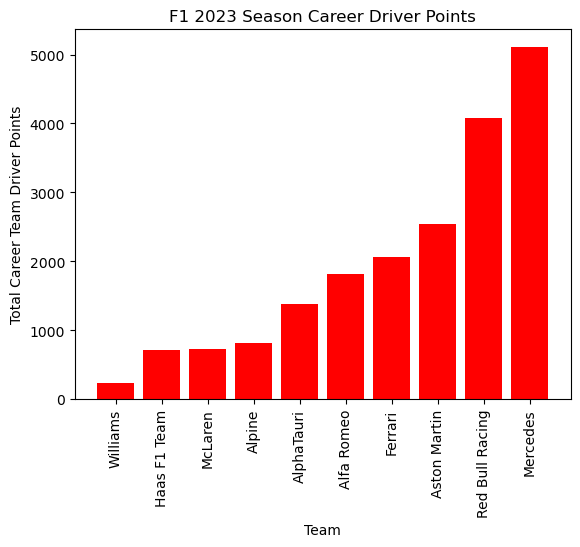

In [9]:
# Creating bar chart
# Setting x to nfl team column and y to fantasy points column
x = new_df["Team"]
y = new_df["Points"]
# Plotting the  bar chart
plt.bar(x, y, width=0.8, color="Red")
# Rotating all x-axis labels vertically that way they fit on the chart
plt.xticks(range(len(x)), x, rotation="vertical")
# Labeling chart
plt.title("F1 2023 Season Career Driver Points")
plt.xlabel("Team")
plt.ylabel("Total Career Team Driver Points")
# Show the chart
plt.show()

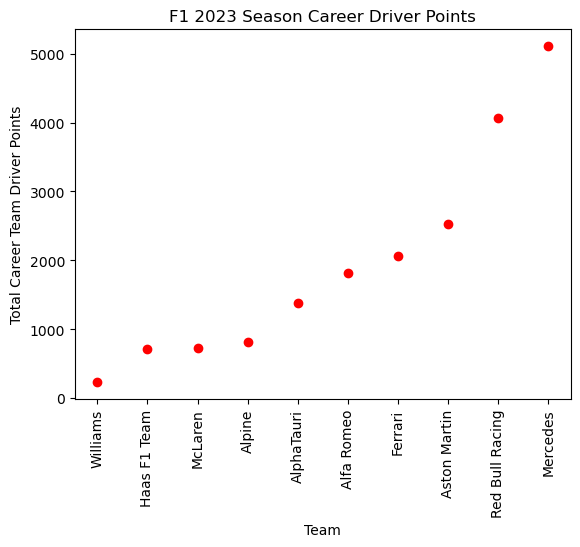

In [10]:
# Create Scatterplot
# Plotting the scatter chart
plt.scatter(x, y, color="red")
# Rotating all x-axis labels vertically that way they fit on the chart
plt.xticks(range(len(x)), x, rotation="vertical")
# Labeling chart
plt.title("F1 2023 Season Career Driver Points")
plt.xlabel("Team")
plt.ylabel("Total Career Team Driver Points")
# Show the chart
plt.show()

In [11]:
# Descriptive Statistics Grouped by team
new_df.describe()

,Points
count,10.000000
mean,1945.450000
std,1578.886623
min,229.000000
25%,751.500000
50%,1595.500000
75%,2415.375000
max,5108.500000


In [12]:
# Group data by country and points
country_df = pd.DataFrame(df.groupby("Country")["Points"].sum()).reset_index(drop=False)
# Make the new df sort by aesending order
country_df = country_df.sort_values(by="Points", ascending=True)

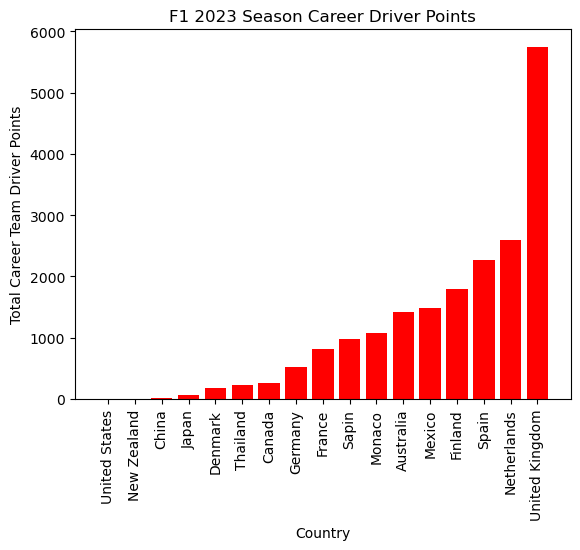

In [13]:
# Creating bar chart
# Setting x to nfl team column and y to fantasy points column
x = country_df["Country"]
y = country_df["Points"]
# Plotting the  bar chart
plt.bar(x, y, width=0.8, color="Red")
# Rotating all x-axis labels vertically that way they fit on the chart
plt.xticks(range(len(x)), x, rotation="vertical")
# Labeling chart
plt.title("F1 2023 Season Career Driver Points")
plt.xlabel("Country")
plt.ylabel("Total Career Team Driver Points")
# Show the chart
plt.show()

In [14]:
# Load geo pandas
import geopandas as gpd

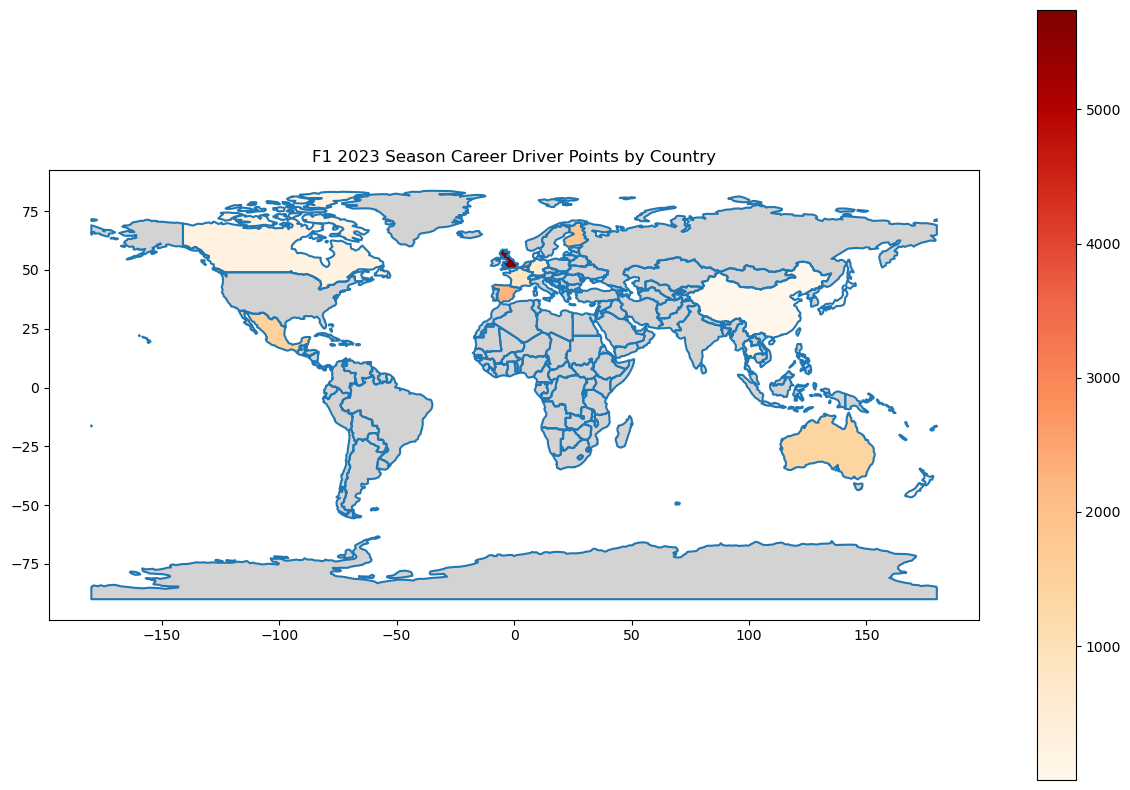

In [15]:
# Load the Natural Earth dataset
url = (
    "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
)
world = gpd.read_file(url)

# Merge data (country_df) with the world geometry based on the "Country" column
merged = world.merge(country_df, left_on="NAME", right_on="Country", how="left")

# Plot the merged GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# Draw country boundaries
merged.boundary.plot(ax=ax)
merged.plot(
    column="Points",
    ax=ax,
    legend=True,
    cmap="OrRd",
    missing_kwds={"color": "lightgrey", "label": "No data"},
)


# Title plot and show
plt.title("F1 2023 Season Career Driver Points by Country")
plt.show()

In [16]:
# Descriptive Statistics Grouped by team
country_df.describe()

,Points
count,17.000000
mean,1144.382353
std,1440.609035
min,1.000000
25%,186.000000
50%,816.000000
75%,1486.000000
max,5741.500000
